--------------------

# **Sequence Models**

--------------------

### **Recurrent Neural Networks (RNN)**

This is a kind of model that takes the ordering of inputs into account. 

This makes it suitable for different applications such as `parts-of-speech tagging`, `music composition`, `language translation`, and the like.

**Example**: **Sentiment Analysis**<br>
We need to differentiate between the following 2 sentences:
```
1: My friends do like the movie but I don't. --> negative review
2: My friends don't like the movie but I do. --> positive review
```

---------------------

--------------

### **LSTM**

--------------


**Dataset: IMDB Dataset - Pretokenized - 8K**

The first layer we will be looking at is the [*LSTM (Long Short-Term Memory)*](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). 

In a nutshell, it computes the state of a current timestep and passes it on to the next timesteps where this state is also updated. The process repeats until the final timestep where the output computation is affected by all previous states. 

Not only that, it can be configured to be **bidirectional** so you can get the relationship of later words to earlier ones. 


For more in-depth idea of how these processes work, check [Sequence Models](https://www.coursera.org/learn/nlp-sequence-models) course of the Deep Learning Specialization.

---------------------------------

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
# We will use the subworkds8k - pre-tokenized [IMDB Reviews dataset]
#    (https://www.tensorflow.org/datasets/catalog/imdb_reviews)
# --------------------------------------
# Download the Dataset
# --------------------------------------
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [3]:
# --------------------------------------
# Preparing the Dataset
# --------------------------------------

# We can then get the train and test splits and generate padded batches. 

## Note: 
# To make the training go faster in this lab, 
# we will increase the batch size. 
# Batch Size = 256 - Training Time = 1 minute per epoch (approx). 
# Batch Size = 16 - Training Time = 4 minutes per epoch.
#
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [4]:
# ---------------------------------------------
# Building and Compiling the Model
# ---------------------------------------------

# Now we will build the model. 
# We will simply swap the `Flatten` or `GlobalAveragePooling1D` from before 
#  with an `LSTM` layer. 
#
# Moreover, you will nest it inside a [Biderectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional) 
# layer so the passing of the sequence information goes both forwards and backwards. 
# 
# These additional computations will naturally make the training go slower than 
#   the models you built last week. 
# 
# We should take this into account when using RNNs in your own applications.

import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [5]:
# -------------------------------
# Compiling the Model
# -------------------------------

# Set the training parameters
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [6]:
# -------------------------------
# Training the Model
# -------------------------------
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 45s 396ms/step - loss: 0.5718 - accuracy: 0.6854 - val_loss: 0.4317 - val_accuracy: 0.8086
Epoch 2/10
98/98 [==============================] - 38s 389ms/step - loss: 0.6139 - accuracy: 0.6682 - val_loss: 0.4725 - val_accuracy: 0.7830
Epoch 3/10
98/98 [==============================] - 40s 404ms/step - loss: 0.3986 - accuracy: 0.8328 - val_loss: 0.4631 - val_accuracy: 0.8035
Epoch 4/10
98/98 [==============================] - 40s 411ms/step - loss: 0.3646 - accuracy: 0.8536 - val_loss: 0.4446 - val_accuracy: 0.8172
Epoch 5/10
98/98 [==============================] - 41s 414ms/step - loss: 0.2650 - accuracy: 0.9004 - val_loss: 0.4500 - val_accuracy: 0.8467
Epoch 6/10
98/98 [==============================] - 41s 418ms/step - loss: 0.2263 - accuracy: 0.9179 - val_loss: 0.3934 - val_accuracy: 0.8364
Epoch 7/10
98/98 [==============================] - 41s 421ms/step - loss: 0.1835 - accuracy: 0.9374 - val_loss: 0.4399 - val_accuracy: 0.8514

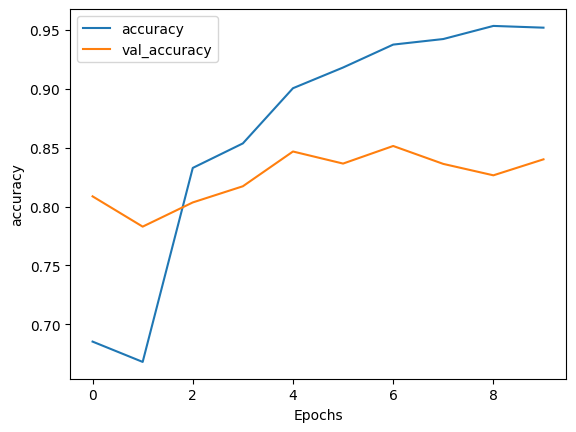

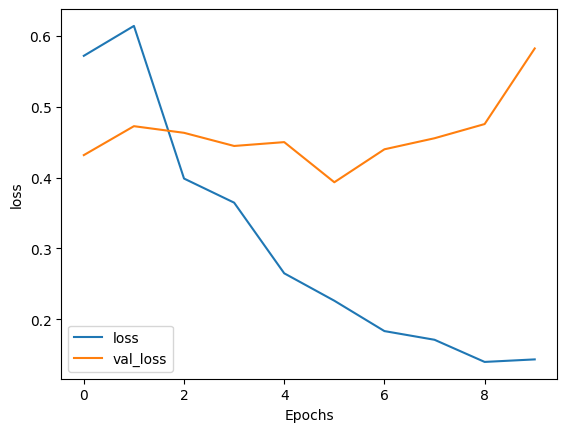

In [14]:
# -------------------------------------------
# Plotting the Model Results
# -------------------------------------------
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**`Here we only used a single LSTM layer but this can be stacked as well to build deeper networks.`**


--------------

### **LSTM - Stacked (Multiple LSTMs)**

--------------

**Dataset: IMDB Dataset - Pretokenized - 8K**


In [3]:
# --------------------------------------
# Download the Dataset
# --------------------------------------
# import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [4]:
# --------------------------------------
# Preparing the Dataset
# --------------------------------------

# We can then get the train and test splits and generate padded batches. 

## Note: 
# To make the training go faster in this lab, 
# we will increase the batch size. 
# Batch Size = 256 - Training Time = 1 minute per epoch (approx). 
# Batch Size = 16 - Training Time = 4 minutes per epoch.
#
BUFFER_SIZE = 10000
BATCH_SIZE = 32

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [5]:
# ---------------------------------------------
# Building and Compiling the Model
# ---------------------------------------------

# You can build multiple layer LSTM models by 
#   simply appending another `LSTM` layer in your `Sequential` model and 
#   enabling the `return_sequences` flag to `True`. 
# 
# This is because an `LSTM` layer expects a sequence input so 
#   if the previous layer is also an LSTM, 
#   then it should output a sequence as well. 

# Let's see the code cell below that demonstrates this flag in action. 

# We notice that the output dimension is in 3 dimensions 
#   `(batch_size, timesteps, features)` 
#   when `return_sequences` is True.
# 
# ------------------------------------------------------------------
# import tensorflow as tf
# import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 16
lstm_dim = 8

print(f'batch_size:                     {batch_size}')
print(f'timesteps (sequence length):    {timesteps}')
print(f'features (embedding size):      {features}')
print(f'lstm output units:              {lstm_dim}')

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array:                           {random_input.shape}')

# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(lstm_dim)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False):   {result.shape}')

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(lstm_dim, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True):    {result.shape}')

batch_size:                     1
timesteps (sequence length):    20
features (embedding size):      16
lstm output units:              8
shape of input array:                           (1, 20, 16)
shape of lstm output(return_sequences=False):   (1, 8)
shape of lstm output(return_sequences=True):    (1, 20, 8)


In [9]:
# -----------------------------------------------------------------
# Building and Compiling the Model - STACKED ARCHITECTURE
# -----------------------------------------------------------------

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [10]:
# -------------------------------
# Compiling the Model
# -------------------------------

# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# -------------------------------
# Training the Model
# -------------------------------
#
# The additional LSTM layer will lengthen the training time. 
# It will take around 2 minutes per epoch to trained.
#
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)


Epoch 1/10
782/782 [==============================] - 260s 325ms/step - loss: 0.5665 - accuracy: 0.7040 - val_loss: 0.5026 - val_accuracy: 0.7642
Epoch 2/10
782/782 [==============================] - 255s 326ms/step - loss: 0.3888 - accuracy: 0.8302 - val_loss: 0.6184 - val_accuracy: 0.6529
Epoch 3/10
782/782 [==============================] - 242s 310ms/step - loss: 0.3540 - accuracy: 0.8470 - val_loss: 0.5827 - val_accuracy: 0.6793
Epoch 4/10
782/782 [==============================] - 261s 334ms/step - loss: 0.3685 - accuracy: 0.8418 - val_loss: 0.5038 - val_accuracy: 0.7556
Epoch 5/10
782/782 [==============================] - 259s 332ms/step - loss: 0.2680 - accuracy: 0.8970 - val_loss: 0.5955 - val_accuracy: 0.7706
Epoch 6/10
782/782 [==============================] - 260s 332ms/step - loss: 0.2345 - accuracy: 0.9104 - val_loss: 0.4956 - val_accuracy: 0.8082
Epoch 7/10
782/782 [==============================] - 265s 339ms/step - loss: 0.2870 - accuracy: 0.8842 - val_loss: 0.4207 -

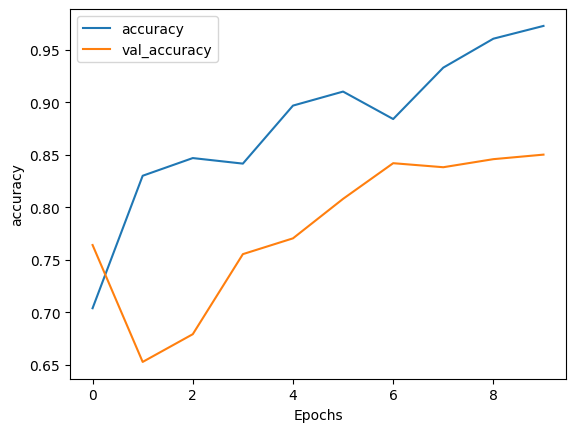

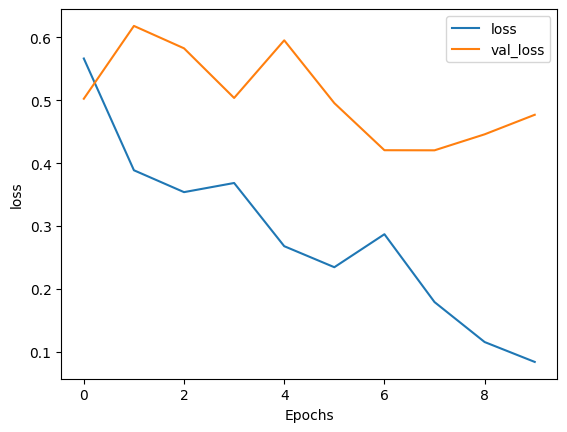

In [14]:
# -------------------------------------------
# Plotting the Model Results
# -------------------------------------------
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# --------------------------------------
# Download the Dataset
# --------------------------------------
# import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [ ]:
# --------------------------------------
# Preparing the Dataset
# --------------------------------------

BUFFER_SIZE = 10000
BATCH_SIZE = 128

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [ ]:
# ---------------------------------------------
# Building the Model
# ---------------------------------------------
# In Course 2, you were using 2D convolution layers because 
#   you were applying it on images. 
# 
# For temporal data such as text sequences, 
#   you will use [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) 
#   instead so the convolution will happen over a single dimension. 
# 
#  You will also append a pooling layer to reduce the output of the convolution layer. 
# 
# For this lab, you will use [GlobalMaxPooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D) 
#   to get the max value across the time dimension. 
#
# You can also use average pooling and you will do that in the next labs. 
# See how these layers behave as standalone layers in the cell below.
# 
# ----------------------------------------------

# Hyperparameters
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

# Define array input with random values
random_input = np.random.rand(batch_size,timesteps,features)
print(f'shape of input array: {random_input.shape}')

# Pass array to convolution layer and inspect output shape
conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

# Pass array to max pooling layer and inspect output shape
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

In [ ]:
# -----------------------------------------------------------------
# Building and Compiling the Model - STACKED ARCHITECTURE
# -----------------------------------------------------------------
#
# We can build the model by simply appending the convolution and pooling layer 
#   after the embedding layer as shown below.

# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# -------------------------------
# Training the Model
# -------------------------------

NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
# -------------------------------------------
# Plotting the Model Results
# -------------------------------------------
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")